<a href="https://colab.research.google.com/github/adityabissa/AI/blob/main/simulatedAnnealingweek5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best board configuration: [5, 1, 6, 4, 0, 7, 4, 4]
Total conflicts: 3


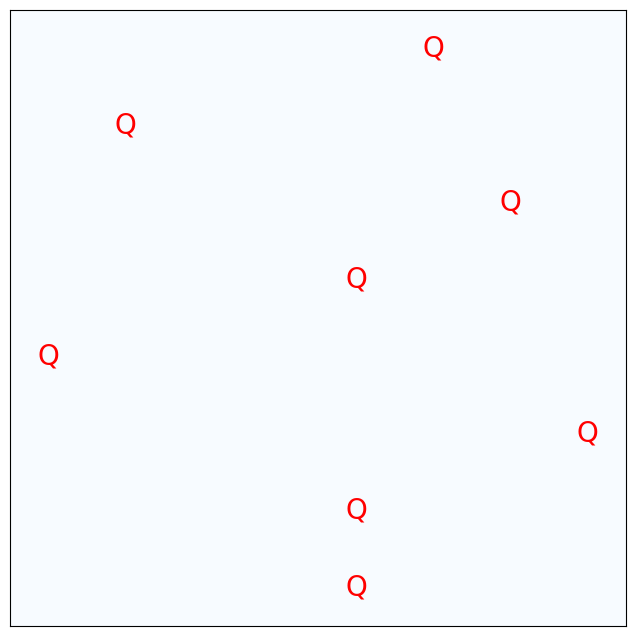

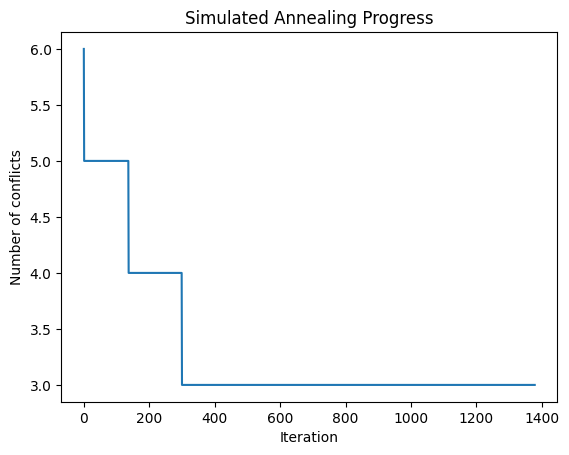

In [3]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt


def calculate_conflicts(board):
    conflicts = 0
    n = len(board)
    for i in range(n):
        for j in range(i + 1, n):
            if board[i] == board[j]:
                conflicts += 1
            elif abs(board[i] - board[j]) == abs(i - j):
                conflicts += 1
    return conflicts


def generate_random_board(n):
    return [random.randint(0, n - 1) for _ in range(n)]

def swap_queens(board):
    new_board = board[:]
    i, j = random.sample(range(len(board)), 2)
    new_board[i], new_board[j] = new_board[j], new_board[i]
    return new_board


def simulated_annealing(n, initial_temp=1000, cooling_rate=0.995, max_iterations=10000):

    current_board = generate_random_board(n)
    current_conflicts = calculate_conflicts(current_board)
    best_board = current_board
    best_conflicts = current_conflicts

    temp = initial_temp
    iteration = 0


    progress = []

    while temp > 1 and iteration < max_iterations:

        neighbor_board = swap_queens(current_board)
        neighbor_conflicts = calculate_conflicts(neighbor_board)

            current_board = neighbor_board
            current_conflicts = neighbor_conflicts


            if current_conflicts < best_conflicts:
                best_board = current_board
                best_conflicts = current_conflicts
        else:

            acceptance_prob = math.exp((current_conflicts - neighbor_conflicts) / temp)
            if random.random() < acceptance_prob:
                current_board = neighbor_board
                current_conflicts = neighbor_conflicts


        temp *= cooling_rate
        iteration += 1

        progress.append(best_conflicts)

    return best_board, best_conflicts, progress

def visualize_board(board):
    n = len(board)
    plt.figure(figsize=(8, 8))
    plt.imshow(np.zeros((n, n)), cmap='Blues')

    for i in range(n):
        plt.text(board[i], i, 'Q', fontsize=20, ha='center', va='center', color='red')

    plt.xticks([])
    plt.yticks([])
    plt.show()

n = 8
best_board, best_conflicts, progress = simulated_annealing(n)

print(f"Best board configuration: {best_board}")
print(f"Total conflicts: {best_conflicts}")


visualize_board(best_board)


plt.plot(progress)
plt.xlabel("Iteration")
plt.ylabel("Number of conflicts")
plt.title("Simulated Annealing Progress")
plt.show()
